# Exploratory Data Analysis of E-Commerce Dataset



## Library and Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

In [ ]:
df_ecommerce = pd.read_csv('ecommerce.csv')

In [ ]:
df_ecommerce.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom
...,...,...,...,...,...,...,...,...
95,568046,23263,SET OF 3 WOODEN HEART DECORATIONS,1,9/23/2011 12:16,1.25,18118,United Kingdom
96,578140,47591D,PINK FAIRY CAKE CHILDRENS APRON,50,11/23/2011 10:58,1.65,14646,Netherlands
97,553186,82551,LAUNDRY 15C METAL SIGN,12,5/15/2011 12:46,1.45,13183,United Kingdom
98,573345,47504K,ENGLISH ROSE GARDEN SECATEURS,3,10/30/2011 12:14,0.79,17609,United Kingdom


In [ ]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


Setelah dicek menggunakan .info() terlihat bahwa data secara utuh/lengkap sebanyak 4870 data. Terlihat tipe data dari sesuai variabel sudah tepat. Namun, nantinya perlu dicek terkait missing value, outlier, dan lainnya.

## Cek & Handling Outlier

### Pengecekan Outlier

memilih kolom-kolom numerik seperti Quantity dan UnitPrice

In [ ]:
numerik_kolom = ['Quantity', 'UnitPrice']

Dengan Visualisasi dalam Pengecekan Outlier -> Boxplot, QQ Plot, dan Distribusi Plot.

Variabel Quantity:


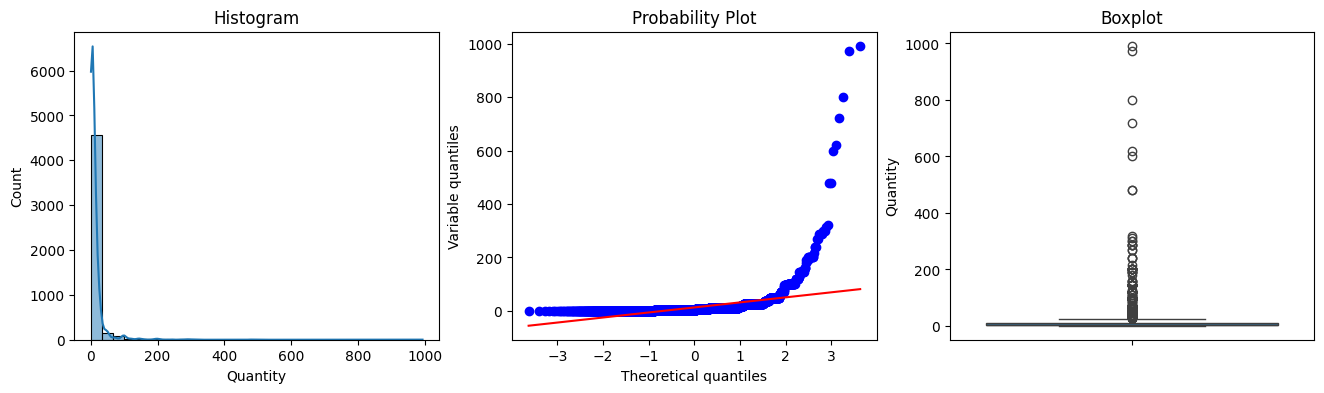

Variabel UnitPrice:


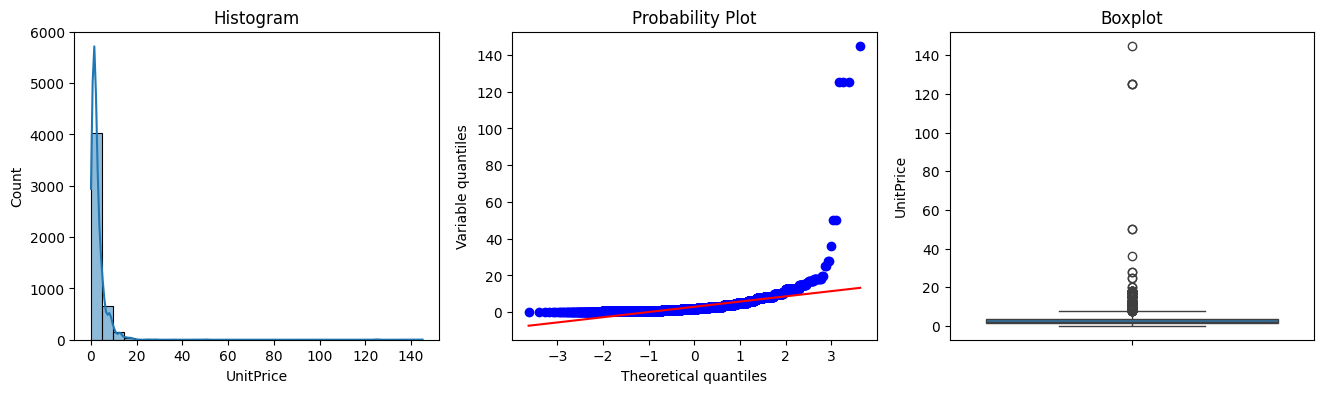

In [ ]:
#Cek dengan plot
def check_outlier(df, variable):

  print(f'Variabel {variable}:')

  #ukuran gambar
  plt.figure(figsize=(16,4))

  #histogram
  plt.subplot(1, 3, 1)
  sns.histplot(df[variable], kde=True, bins=30)
  plt.title('Histogram')

  #boxplot
  plt.subplot(1, 3, 3)
  sns.boxplot(y=df[variable])
  plt.title('Boxplot')


  #probplot
  plt.subplot(1, 3, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.ylabel('Variable quantiles')

  plt.show()

for i in numerik_kolom:
  check_outlier(df_ecommerce, i)

Setelah dilakukan pengecekan, dapat didapatkan bahwa:

**Variabel Quantity:**
- Histogram: Tidak membentuk suatu histogram (indikasi outlier)
- QQ Plot: Ada banyak data yang tidak mendekati garis linier
- Boxplot: Ada banyak data yang berada di luar batas nilai maksimum hingga menumpuk (data ekstrem)
Sehingga, variabel Quantity terindikasi adanya outlier perlu dilakukan handling (drop data).

**Variabel UnitPrice:**
- Histogram: Tidak membentuk suatu histogram (indikasi outlier)
- QQ Plot: Ada beberapa data yang tidak mendekati garis linier
- Boxplot: Ada beberapa data yang berada di luar batas nilai maksimum hingga menumpuk (data ekstrem)
Sehingga, variabel UnitPrice terindikasi adanya outlier perlu dilakukan handling (drop data).

### Handling Outlier

Karena kolom Quantity dan UnitPrice terdapat outlier maka perlu dilakukan handling menggunakan pendekatan IQR (untuk drop data)

In [ ]:
#looping IQR
def batas(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound, lower_bound

#disimpan dict
batas_dict = {i: batas(df_ecommerce, i) for i in numerik_kolom}

for i in numerik_kolom:
    lower, upper = batas_dict[i]
    print(f"Variable: {i}, Lower Bound: {lower}, Upper Bound: {upper}")
    df_ecommerce = df_ecommerce[(df_ecommerce[i] <= lower) & (df_ecommerce[i] >= upper)]

Variable: Quantity, Lower Bound: 27.0, Upper Bound: -13.0
Variable: UnitPrice, Lower Bound: 7.5, Upper Bound: -2.5


Variabel Quantity:


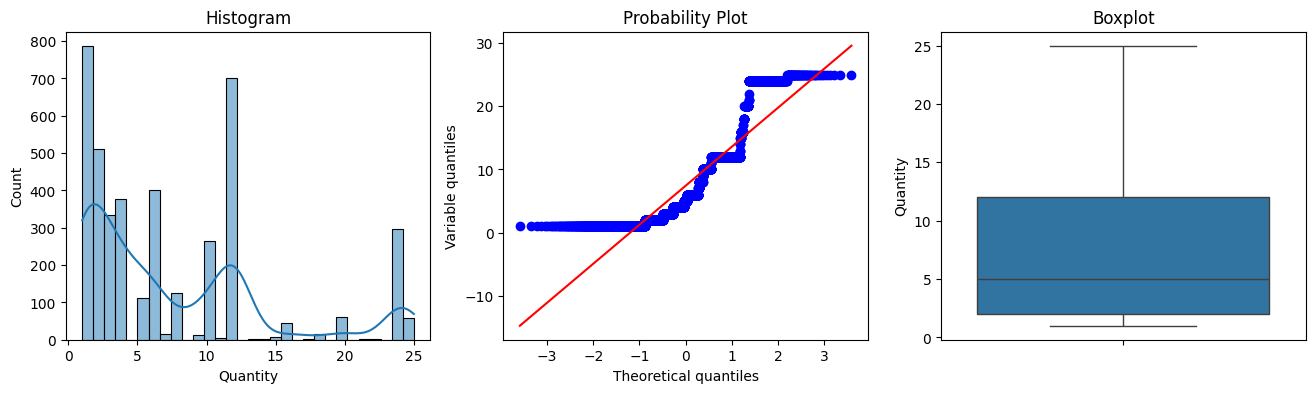

Variabel UnitPrice:


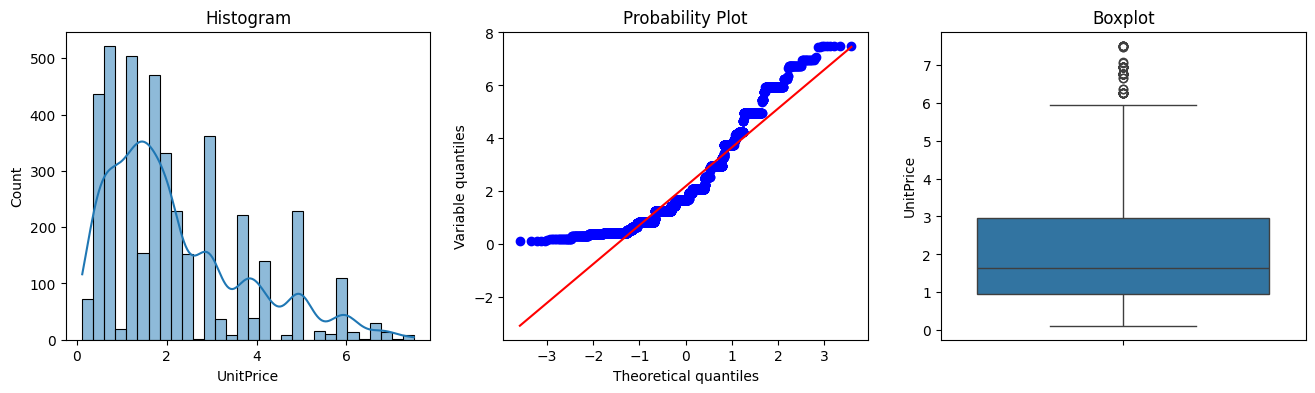

In [ ]:
# Melakukan loop untuk mengecek distribusi tiap kolom
for i in numerik_kolom:
  check_outlier(df_ecommerce, i)

Variabel-variabel tersebut setelah dihandling, didapatkan bahwa:

**Variabel Quantity**
- Histogram cenderung tidak membentuk distribusi skewness dan mendekati distribusi normal.
- QQ plot cenderung mendekati garis linear (tidak begitu ada data yang ekstrem).
- Boxplot tidak terdapat data-data ekstrem atau melewati batas nilai maks dan minimum.
- Maka variabel **Quantity** bersih dari outlier.

**Variabel UnitPrice**
- Histogram cenderung tidak membentuk distribusi skewness dan mendekati distribusi normal.
- QQ plot cenderung mendekati garis linear (tidak begitu ada data yang ekstrem).
- Boxplot terdapat data-data yang berhimpitan, mungkin masih bisa masuk sebagai data tidak ekstrem karena datanya tidak begitu jauh dari batasnya.
- Maka variabel **UnitPrice** bersih dari outlier.

Meskipun terdapat pencilan di UnitPrice setelah dicek, nilai-nilainya dianggap wajar karena tidak terlalu jauh dari nilai lainnya.

## Cek & Handling Missing Value

### Pengecekan Missing Value

In [ ]:
#melihat data yang missing value
df_ecommerce[df_ecommerce.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Ternyata tidak ada missing value pada setiap variabelnya, maka aman. Namun, kita perlu mengecek data aneh dalam setiap variabelnya.

In [ ]:
#cek variabel aneh menggunakan value_counts()
for column in df_ecommerce.columns:
    print(f"============= {column} =================")
    display(df_ecommerce[column].value_counts())
    print()

============= InvoiceNo =================


,count
InvoiceNo,
562046,8
576339,6
578270,6
559552,6
575491,6
...,...
542412,1
579170,1
536551,1



============= StockCode =================


,count
StockCode,
47566,20
84991,17
85099B,17
22720,16
22993,16
...,...
44228,1
22550,1
21906,1



============= Description =================


,count
Description,
PARTY BUNTING,20
JUMBO BAG RED RETROSPOT,17
60 TEATIME FAIRY CAKE CASES,17
SET OF 4 PANTRY JELLY MOULDS,16
SET OF 3 CAKE TINS PANTRY DESIGN,16
...,...
DOORMAT ENGLISH ROSE,1
BLUE SCANDINAVIAN PAISLEY WRAP,1
CANNABIS LEAF BEAD CURTAIN,1



============= Quantity =================


,count
Quantity,
1,786
12,702
2,512
6,402
4,377
3,333
24,298
10,265
8,125



============= InvoiceDate =================


,count
InvoiceDate,
8/2/2011 10:34,8
5/23/2011 13:17,6
7/10/2011 16:29,6
10/13/2011 12:59,6
11/14/2011 15:27,6
...,...
11/24/2011 11:19,1
8/21/2011 14:42,1
9/30/2011 10:20,1



============= UnitPrice =================


,count
UnitPrice,
1.25,504
1.65,422
2.95,330
0.85,320
0.42,271
...,...
3.45,1
5.49,1
0.38,1



============= CustomerID =================


,count
CustomerID,
17841,105
14911,61
12748,61
14096,49
14606,48
...,...
15065,1
13450,1
16362,1



============= Country =================


,count
Country,
United Kingdom,3756
Germany,97
France,69
EIRE,69
Switzerland,23
Belgium,20
Spain,18
Portugal,13
Norway,10


Setelah dicek, terdapat nama variabel aneh yaitu 'Unspecified' maka perlu dilakukan handling dengan pendekatan **Modus** untuk **handling missing value data kategorik**. Namun, kita harus cek persentase missing value terlebih dahulu, apakah di drop atau dilakukan imputasi menggunakan pendekatan modus.

In [ ]:
# Menghitung persentase nilai 'Unspecified' di kolom Country
100 * len(df_ecommerce[df_ecommerce['Country'].isin(['Unspecified'])]) / len(df_ecommerce)

0.07239382239382239

Karena hanya 0,07% maka perlu dihandling dengan pendekatan modus. Meskipun proporsi / persentasenya kecil, tetap dilakukan handling missing value. Hal ini, agar tidak mengganggu distirbusi data dan lainnya.

### Handling Missing Value

In [ ]:
#Mode imputation Untuk Country
Country_mode = df_ecommerce[~df_ecommerce['Country'].isin(['Unspecified'])]['Country'].mode()[0] #[0] mengambil nama valuenya
Country_mode

'United Kingdom'

In [ ]:
#implement missing value imputation
df_ecommerce['Country'] = df_ecommerce['Country'].apply(lambda x: Country_mode if x in ['Unspecified'] else x)

In [ ]:
#cek variabel aneh menggunakan value_counts()
for column in df_ecommerce.columns:
    print(f"============= {column} =================")
    display(df_ecommerce[column].value_counts())
    print()

============= InvoiceNo =================


,count
InvoiceNo,
562046,8
576339,6
578270,6
559552,6
575491,6
...,...
542412,1
579170,1
536551,1



============= StockCode =================


,count
StockCode,
47566,20
84991,17
85099B,17
22720,16
22993,16
...,...
44228,1
22550,1
21906,1



============= Description =================


,count
Description,
PARTY BUNTING,20
JUMBO BAG RED RETROSPOT,17
60 TEATIME FAIRY CAKE CASES,17
SET OF 4 PANTRY JELLY MOULDS,16
SET OF 3 CAKE TINS PANTRY DESIGN,16
...,...
DOORMAT ENGLISH ROSE,1
BLUE SCANDINAVIAN PAISLEY WRAP,1
CANNABIS LEAF BEAD CURTAIN,1



============= Quantity =================


,count
Quantity,
1,786
12,702
2,512
6,402
4,377
3,333
24,298
10,265
8,125



============= InvoiceDate =================


,count
InvoiceDate,
8/2/2011 10:34,8
5/23/2011 13:17,6
7/10/2011 16:29,6
10/13/2011 12:59,6
11/14/2011 15:27,6
...,...
11/24/2011 11:19,1
8/21/2011 14:42,1
9/30/2011 10:20,1



============= UnitPrice =================


,count
UnitPrice,
1.25,504
1.65,422
2.95,330
0.85,320
0.42,271
...,...
3.45,1
5.49,1
0.38,1



============= CustomerID =================


,count
CustomerID,
17841,105
14911,61
12748,61
14096,49
14606,48
...,...
15065,1
13450,1
16362,1



============= Country =================


,count
Country,
United Kingdom,3759
Germany,97
France,69
EIRE,69
Switzerland,23
Belgium,20
Spain,18
Portugal,13
Norway,10


Data variabel Country sudah terhandling untuk 'Unspecified'. Lanjut ke tahapan selanjutnya.

## Tahapan Encoding

- Melakukan encoding untuk data kategorikal menjadi numerik dengan pendekatan aturan encoding sebagai pelabelan untuk machine learning.
- Memilih data kategorikal, yaitu Country karena tipenya kardinalitas maka menggunakan Mean Encoding.
- Ketika menggunakan Mean Encoding, maka perlu variabel target yaitu 'UnitPrice'

**Namun, perlu diketahui sebenarnya** dalam kasus EDA ini mungkin karena belum masuk Machine Learning, jadi untuk tim-tim pada perusahaan yang masih awam, lebih baik tidak perlu dilakukan encoding. Karena dari secara isinya-isinya sudah jelas dan bisa dipahami. Sehingga, lebih baik tidak perlu dilakukan encoding, karena secara data keseluruhan masih bisa dipahami dan tidak dibutuhkan untuk keperluan analisis lanjutan (Machine Learning).

## Tahapan Scalling

Scalling dilakukan untuk menstandarisasi satuan pada suatu variabel jika tidak sama, nah dalam kasus data e-commerce ini pada variabel 'Quantity' dan 'UnitPrice' berbeda, seharusnya perlu dilakukan scalling. Tetapi, untuk tujuan EDA sebenarnya **Opsional** karena jikalau variabel-varaibel tersebut masih bisa dipahami oleh tim/orang awam maka tidak perlu dilakukan scalling, kecuali tujuannya untuk analisis lanjutan (Machine Learning) maka perlu dilakukan scalling.

**Menyimpan data ke data df_bersih**

In [ ]:
df_bersih = df_ecommerce.copy()
df_bersih

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom
...,...,...,...,...,...,...,...,...
4865,571883,23263,SET OF 3 WOODEN HEART DECORATIONS,1,10/19/2011 13:58,1.25,14704,United Kingdom
4866,545530,21922,UNION STRIPE WITH FRINGE HAMMOCK,12,3/3/2011 13:45,6.95,17416,United Kingdom
4867,540458,21125,SET 6 FOOTBALL CELEBRATION CANDLES,12,1/7/2011 12:28,1.25,12501,Germany
4868,574289,22999,TRAVEL CARD WALLET VINTAGE LEAF,24,11/3/2011 15:16,0.42,17750,United Kingdom


In [ ]:
#copy dataset
df_ecommerce = df_bersih.copy()

In [ ]:
df_ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [ ]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4144 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4144 non-null   int64  
 1   StockCode    4144 non-null   object 
 2   Description  4144 non-null   object 
 3   Quantity     4144 non-null   int64  
 4   InvoiceDate  4144 non-null   object 
 5   UnitPrice    4144 non-null   float64
 6   CustomerID   4144 non-null   int64  
 7   Country      4144 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 420.4+ KB


# Insight of Analyze

### Analisa 1

Perusahaan ingin tahu terkait:

1. a). Bagaimana total penjualan (total amount) berdasarkan kategori produk dan 5 produk mana yang paling tinggi total penjualannya?

In [ ]:
#Nomor 1
#Membuat total amount
df_ecommerce['TotalAmount'] = df_ecommerce['Quantity'] * df_ecommerce['UnitPrice']

#Groupby
df_no1 = df_ecommerce.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(5)
df_no1

,TotalAmount
Description,
PARTY BUNTING,648.45
SET OF 3 CAKE TINS PANTRY DESIGN,427.40
CHILLI LIGHTS,355.60
WHITE HANGING HEART T-LIGHT HOLDER,315.65
SPOTTY BUNTING,306.90


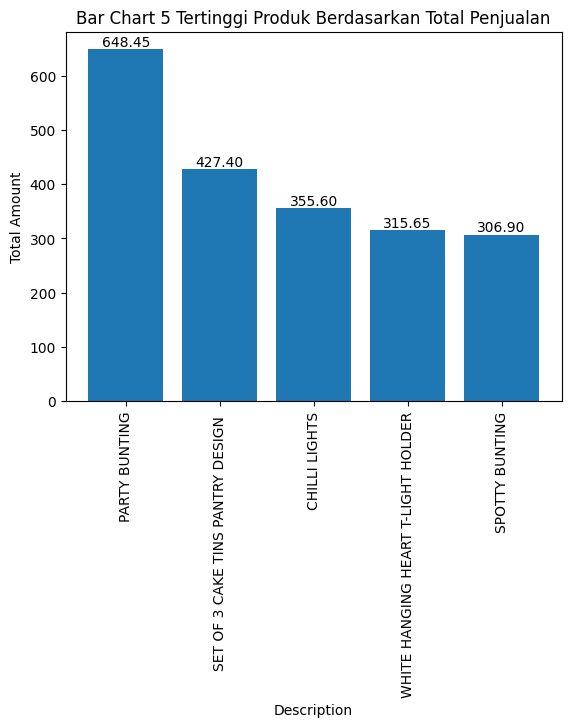

In [ ]:
#Visualisasi
plt.bar(df_no1.index, df_no1.values)
plt.xlabel('Description')
plt.ylabel('Total Amount')
plt.title('Bar Chart 5 Tertinggi Produk Berdasarkan Total Penjualan')
plt.xticks(rotation=90)
#teks
for i, v in enumerate(df_no1.values):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()

**Insight:** Berdasarkan hasil analisis dan visualisasi di atas didapatkan bahwa total penjualan terbanyak untuk kategori produk pada 5 tertinggi yaitu Produk 'Party Bunting' dengan total penjualan sebanyak 648,45. Hal ini, menunjukkan bahwa produk 'Party Bunting' berkontribusi besar pada perusahaan dari segi pendapatan, sehingga perusahaan perlu menetapkan strategi untuk lebih memasarkan produk 'Party Bunting'.Seperti, pengoptimalan stok dan distribusi untuk produk tersebut dan mempertimbangkan paket bundling sebagai strategi upselling atau promosi lanjutan.

1. b). Bagaimana Hubungan antara Unit Price dan Total Quantity ?

In [ ]:
hubungan = df_ecommerce.groupby('UnitPrice')['Quantity'].sum().reset_index()
hubungan

,UnitPrice,Quantity
0,0.12,58
1,0.16,10
2,0.19,213
3,0.21,33
4,0.29,499
...,...,...
70,6.95,75
71,7.05,2
72,7.08,10
73,7.46,2


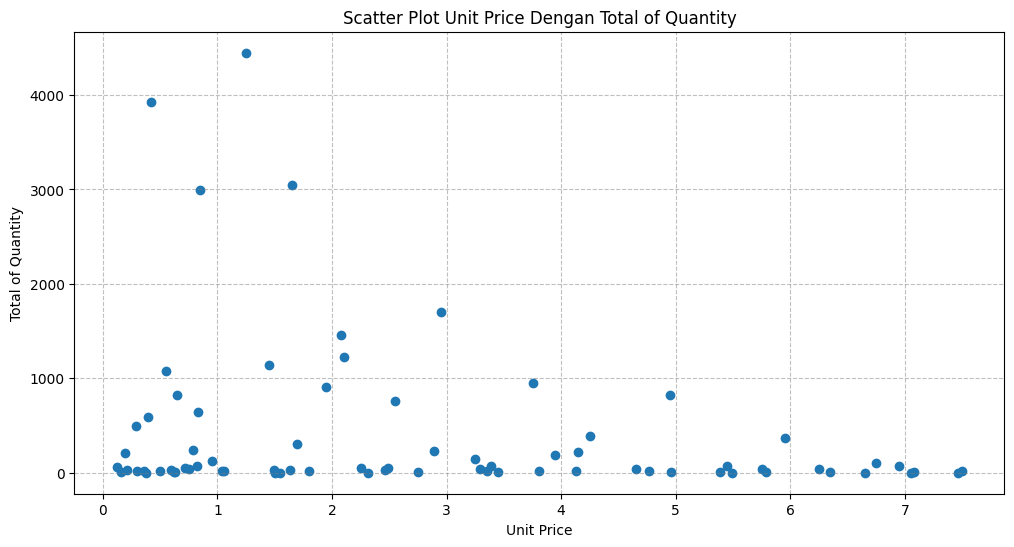

In [ ]:
#Scatterplot visualisasi
plt.subplots(figsize=(12,6))
plt.scatter(hubungan['UnitPrice'], hubungan['Quantity'])
plt.title('Scatter Plot Unit Price Dengan Total of Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Total of Quantity')
plt.grid(color='gray', linestyle='--', alpha=0.5)
plt.show()

**Insight:**
- Data kebanyakan mengumpul diantara **0 sampai 1000** (dominasi) untuk 'Total Quantity' dengan 'UnitPrice' rendah diantara **0 sampai 4** dimana penjualan tertinggi terjadi pada produk-produk dengan harga yang murah. Semakin mahal suatu produk, maka jumlah penjualan (total of quantity) akan semakin kecil.
- Produk dengan **harga unit rendah** (misalnya, di bawah 4) tampaknya lebih sering dibeli dalam jumlah besar. Hal ini menunjukkan preferensi konsumen untuk barang dengan harga yang lebih terjangkau.
- Produk dengan **harga unit termahal** (misalnya, diatas 5) memiliki kuantitas lebih rendah artinya produk ini mungkin lebih eksklusif atau hanya menarik pada pasar tertentu.
- Hal ini, menjadi **landasan temuan** untuk perusahaan/tim dalam segmentasi market dalam pola konsumen terhadap suatu produk guna sebagai evaluasi atau pengembangan untuk penetapan strategi agar dapat meningkatkan penjualan dan memaksimalkan target suatu produk dalam e-commerce.

### Analisa 2


Perusahaan ingin tahu terkait:

2. Bagaimana kondisi Total Penjualan e-commerce pada Tahun 2011 dan tunjukkan apakah terjadi kenaikan/penurunan signifikan polanya ?

In [ ]:
#Nomor2
df_ecommerce['InvoiceDate'] = pd.to_datetime(df_ecommerce['InvoiceDate'])
df_ecommerce['Year'] = df_ecommerce['InvoiceDate'].dt.year
df_ecommerce['Month'] = df_ecommerce['InvoiceDate'].dt.month_name()
df_ecommerce[df_ecommerce['Year'] == 2011]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08,2011,May
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10,2011,July
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65,2011,July
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00,2011,July
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55,2011,February
...,...,...,...,...,...,...,...,...,...,...,...
4865,571883,23263,SET OF 3 WOODEN HEART DECORATIONS,1,2011-10-19 13:58:00,1.25,14704,United Kingdom,1.25,2011,October
4866,545530,21922,UNION STRIPE WITH FRINGE HAMMOCK,12,2011-03-03 13:45:00,6.95,17416,United Kingdom,83.40,2011,March
4867,540458,21125,SET 6 FOOTBALL CELEBRATION CANDLES,12,2011-01-07 12:28:00,1.25,12501,Germany,15.00,2011,January
4868,574289,22999,TRAVEL CARD WALLET VINTAGE LEAF,24,2011-11-03 15:16:00,0.42,17750,United Kingdom,10.08,2011,November


<ipython-input-242-922752e4ab1e>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_no2 = df_ecommerce[df_ecommerce['Year'] == 2011].groupby('Month')['TotalAmount'].sum()


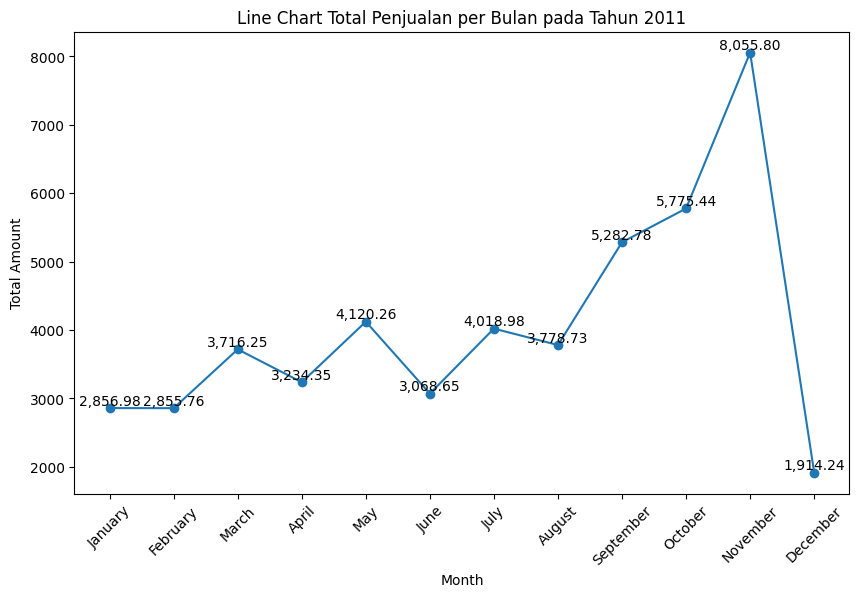

In [ ]:
#Visualisasi
plt.figure(figsize=(10, 6))
# urutan month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_ecommerce['Month'] = pd.Categorical(df_ecommerce['Month'], categories=month_order, ordered=True)

#Plot
df_no2 = df_ecommerce[df_ecommerce['Year'] == 2011].groupby('Month')['TotalAmount'].sum()
plt.plot(df_no2, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Line Chart Total Penjualan per Bulan pada Tahun 2011')
plt.xticks(rotation=45)
#teks
for i, (month, v) in enumerate(df_no2.items()):
    plt.text(month, v, f"{v:,.2f}", ha='center', va='bottom', fontsize=10)
plt.show()

**Insight:** Berdasarkan analisis dan visualisasi di atas didapatkan bahwa kondisi total penjualan di Tahun 2011 secara keseluruhan terjadi **fluktuansi yang signifikan pada seluruh periode bulanannya**. Kenaikan tertinggi terjadi pada **bulan November** dengan total penjualan yang didapatkan **sebesar 8.055,80** (sekitar 39,5%). Hal ini, mengapa bisa kenaikan yang cukup signifikan dibandingkan pada bulan-bulan lainnaya, apakah pada Bulan November terdapat event tertentu yang menyebabkan customer banyak sekali membeli suatu produk di perusahaan. Selain itu, ketika kita lihat pada **bulan Desember**, terjadi penuruan yang cukup signifikan dari segi total penjualannya. Hal ini, perlu dilakukan evaluasi oleh perusahaan mengapa terjadi penurunan dari segi total penjualannya, apakah produk kurang laku atau dari segi pemasaran kurang sesuai, sehingga customer tidak minat dalam suatu produk.

Inti rekomendasi yang mungkin:
- Pengoptimalan Promosi di Bulan Puncak: Jika ada bulan dengan penjualan tinggi, maksimalkan kampanye pemasaran pada periode tersebut.
- Strategi dalam evaluasi di Bulan Rendah: Untuk bulan dengan penurunan penjualan, pertimbangkan promosi tambahan atau program loyalitas pelanggan.
- Analisis Lebih Lanjut pada Produk dan Negara (memeriksa pola).

### Analisa 3

Perusahaan ingin tahu terkait:

3.
a). Kelompokkan pelanggan berdasarkan CustomerID dan negara (Country). Apakah ada perbedaan pola pembelian antara pelanggan lokal dan internasional? Asumsikan Pelanggan lokal adalah United Kingdom (UK)
b). Jikalau tertinggi suatu negara X, coba produk apa yang paling laris dibeli di negara X  ?

In [ ]:
#Unique
df_ecommerce.groupby(['Country'])['CustomerID'].nunique().sort_values(ascending=False).reset_index(False)

,Country,CustomerID
0,United Kingdom,1583
1,Germany,46
2,France,36
3,Belgium,11
4,Switzerland,9
5,Spain,9
6,Portugal,6
7,Sweden,5
8,Norway,4
9,Greece,4


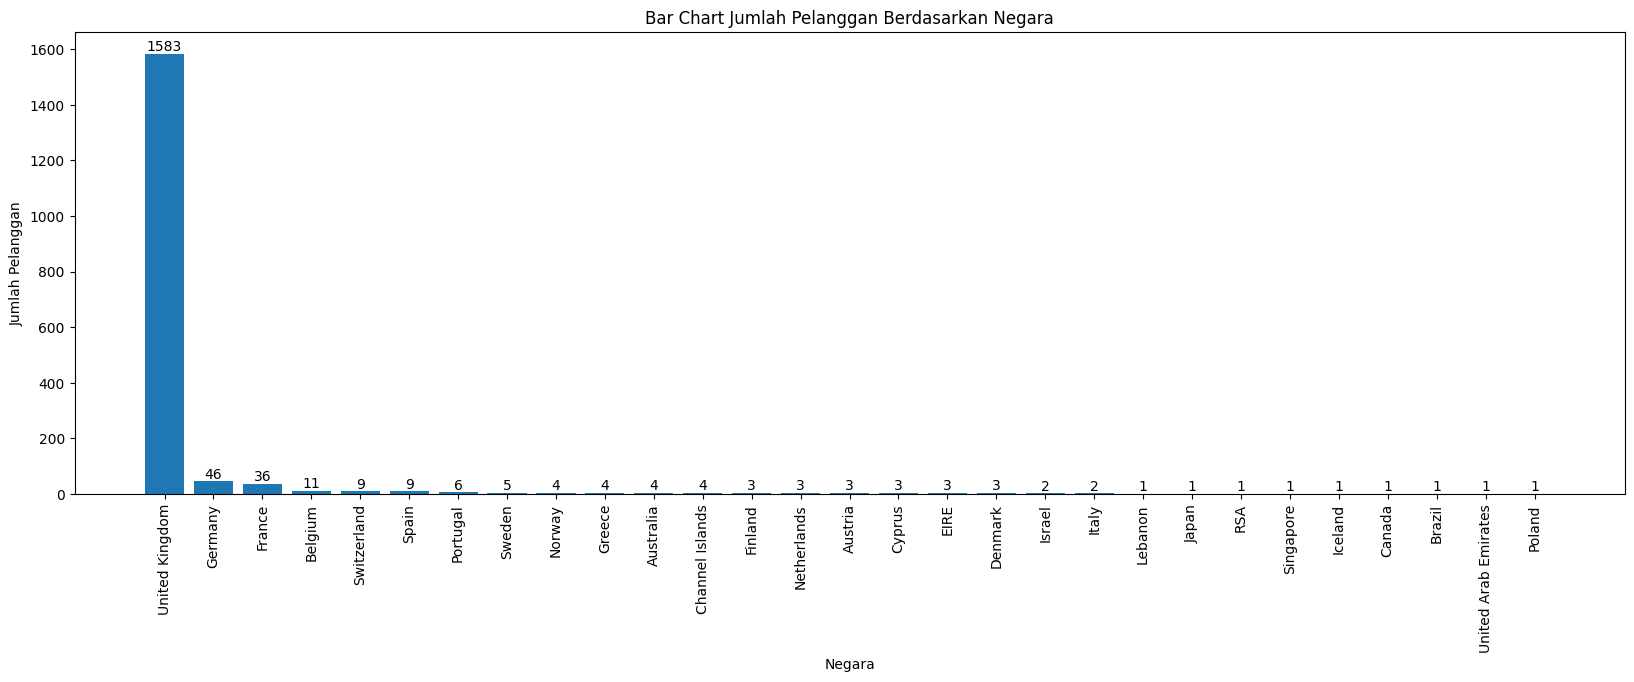

In [ ]:
#Visualisasi
plt.figure(figsize=(20, 6))
df_no3 = df_ecommerce.groupby(['Country'])['CustomerID'].nunique().sort_values(ascending=False).reset_index(False)
plt.bar(df_no3['Country'], df_no3['CustomerID'])
plt.xlabel('Negara')
plt.ylabel('Jumlah Pelanggan')
plt.title('Bar Chart Jumlah Pelanggan Berdasarkan Negara')
plt.xticks(rotation=90)
#teks
for i, v in enumerate(df_no3['CustomerID']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

**Insight:** Perlu diketahui bahwa dalam analisis di atas digunakan data yang unique yang bertujuan untuk mencari jumlah pelanggan yang paling banyak membeli suatu produk di perusahaan berdasarkan setiap negara (untuk memahami preferensi pasar).
- Nah, ternyata **Negara Lokal (United Kingdom)** yang menjadi kontribusi terbesar pelanggan dalam membeli suatu produk sebesar **1583 customer** dibandingkan **pelanggan internasional**. Hal ini, menunjukkan bahwa sasaran yang paling banyak adalah pelanggan lokal sendiri dibandingkan internasional (Pola pelanggan untuk e-commerce adalah kebanyakan lokal dibandingkan internasional). Artinya, mungkin pelanggan di UK cenderung lebih sering membeli produk tertentu yang relevan dengan budaya atau kebiasaan lokal, sedangkan pelanggan internasional mungkin lebih tertarik pada produk global atau lebih premium.
- Mungkin, dari segi harga atau kualitas untuk pelanggan internasional lebih tertarik pada produknya negara masing-masing dibandingkan dengan produk lokal (UK), sehingga pelanggan dari internasional tidak begitu dominan.

Hal ini, mungkin bisa jadi **evaluasi bagi tim market/pemasaran dan perusahaan** untuk memasarkan lagi di kancah internasional agar produk-produk perusahaan bisa dikenal pelanggan internasional, sehingga meningkatkan pendapatan perusahaan.

Tambahan:
- Dari analisa dan visualisasi diatas membantu perusahaan untuk bisa mengidentifikasi preferensi pasar yang berbeda berdasarkan lokasi.
- Produk yang paling laris di negara dengan transaksi terbanyak memberikan wawasan berharga untuk strategi pemasaran dan pengelolaan stok.
- Segmen pasar lokal (UK) vs. internasional memerlukan strategi yang disesuaikan untuk memaksimalkan nilai transaksi dan kepuasan pelanggan.

Karena negara 'UK' yang paling dominan pelanggan dalam e-commerce, maka kita breakdown lagi produk mana yang paling banyak dibeli.

In [ ]:
df_uk = df_ecommerce[df_ecommerce['Country'] == 'United Kingdom']
df_uk_fix = df_uk.groupby(['Description'])['CustomerID'].nunique().sort_values(ascending=False).head(8)
df_uk_fix

,CustomerID
Description,
PARTY BUNTING,17
JUMBO BAG RED RETROSPOT,16
SET OF 4 PANTRY JELLY MOULDS,16
60 TEATIME FAIRY CAKE CASES,15
SET OF 3 CAKE TINS PANTRY DESIGN,15
SPOTTY BUNTING,14
JAM MAKING SET PRINTED,14
PAPER CHAIN KIT 50'S CHRISTMAS,13


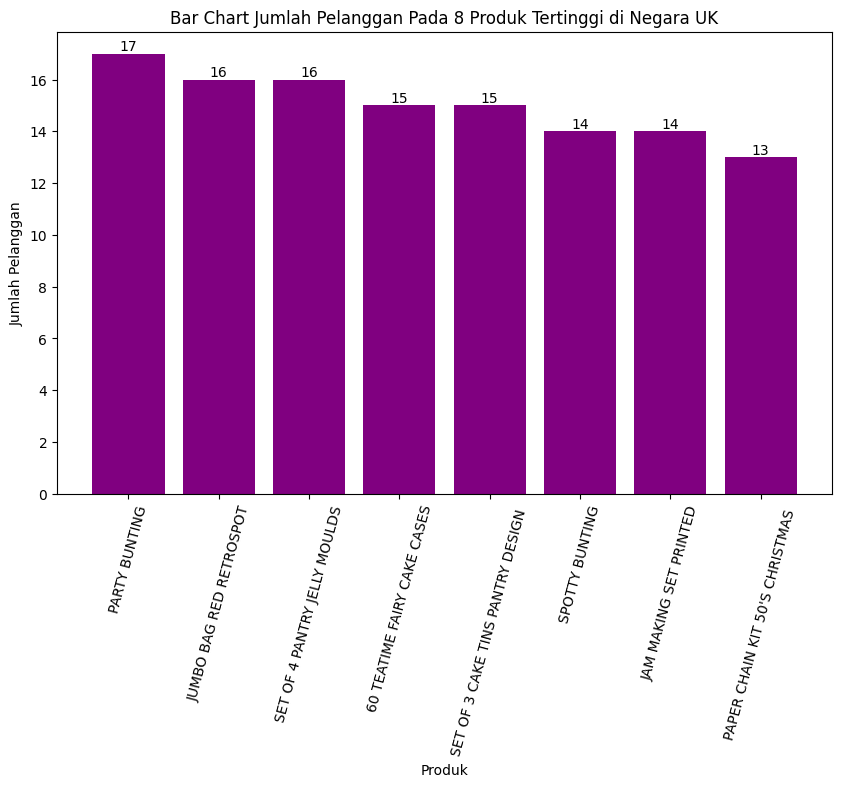

In [ ]:
#Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(df_uk_fix.index, df_uk_fix.values, color='purple')
plt.xlabel('Produk')
plt.ylabel('Jumlah Pelanggan')
plt.title('Bar Chart Jumlah Pelanggan Pada 8 Produk Tertinggi di Negara UK')
plt.xticks(rotation=75)
#teks
for i, v in enumerate(df_uk_fix.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

**Insight 2:** Setelah dibreakdown, ternyata pada Negara United Kingdom, produk Party Bunting memang banyak dibeli oleh pelanggan UK di e-commerce sebanyak **17 pelanggan**. Maka, perusahaan perlu menerapkan strategi pada produk Party Bunting ini dimana menjadi minat pelanggan di UK, begitu juga dengan produk tertinggi lainnya. Hal ini, agar dapat meningkatkan pendapatan e-commerce di suatu perusahaan, serta yang pasti tetap mengevaluasi, mengembangkan, dan menjaga kualitas dari suatu produk.

### Analisa 4

Perusahaan ingin tahu terkait:
4. Kelompokkan data berdasarkan CustomerID dan InvoiceNo, lalu menghitung total jumlah produk (Quantity) yang dibeli per invoice dengan total nilai transaksi (Quantity * UnitPrice). Kemudian, lakukan Filter hanya pelanggan dengan lebih dari 20 transaksi dan total nilai transaksi di atas 300. Kemudian urutkan mana yang Customer dengan total transaksi terbanyak. Hal ini, ingin menentukan customer yang akan mendapatkan benefit dengan ketentuan seperti itu.

In [ ]:
# Hitung transaksi
customer_transactions = df_ecommerce.groupby('CustomerID').agg(
    Total_Transactions=('InvoiceNo', 'count'),
    Total_Amount=('TotalAmount', 'sum')
).reset_index()
customer_transactions

#Filter pelanggan > 20 transaksi dan total nilai penjualan/transaksi diatas > 300
filtered_customers = customer_transactions[(customer_transactions['Total_Transactions'] > 20 ) & (customer_transactions['Total_Amount'] > 300)].reset_index(drop=True)
filtered_customers

fix_no4 = filtered_customers.sort_values(by='Total_Transactions', ascending=False)
fix_no4

,CustomerID,Total_Transactions,Total_Amount
4,17841,105,578.22
0,12748,61,358.31
3,14911,61,1268.91
2,14096,49,432.14
1,13089,21,506.00


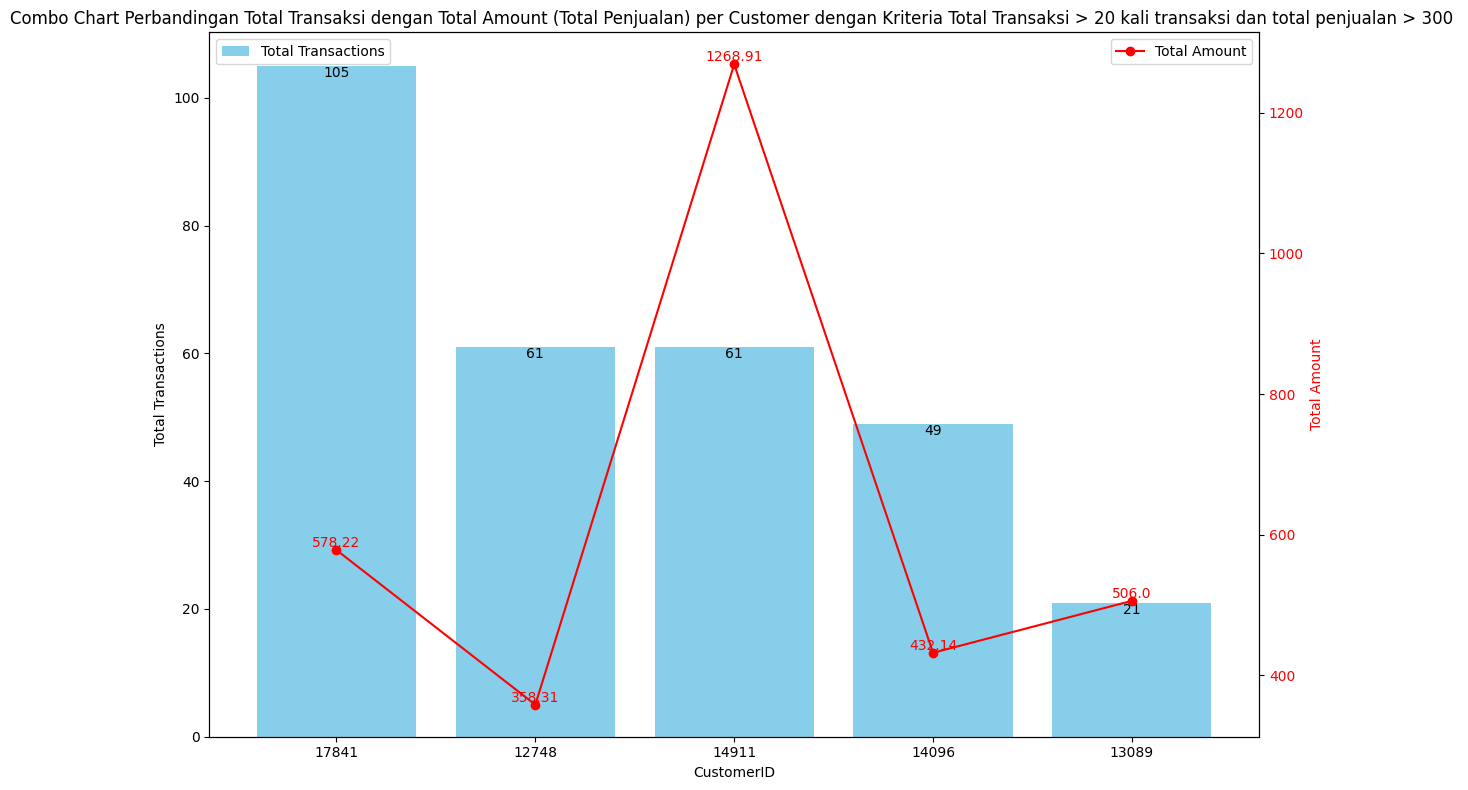

In [ ]:
#Visualisasi bar+line (Combo Chart)
#tata letak
fig, ax1 = plt.subplots(figsize=(12, 8))

#bar
ax1.bar(fix_no4['CustomerID'].astype(str),
        fix_no4['Total_Transactions'],
        color='skyblue',
        label='Total Transactions')
ax1.set_xlabel('CustomerID')
ax1.set_ylabel('Total Transactions', color='black')
ax1.tick_params(axis='y', labelcolor='black')

#teks bar chart
for i, v in enumerate(fix_no4['Total_Transactions']):
    plt.text(i, v, str(v), ha='center', va='top')

#line
ax2 = ax1.twinx()
ax2.plot(fix_no4['CustomerID'].astype(str),
         fix_no4['Total_Amount'],
         color='red',
         marker='o',
         linestyle='-',
         label='Total Amount')
ax2.set_ylabel('Total Amount', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


#teks line chart
for i, v in enumerate(fix_no4['Total_Amount']):
    plt.text(i, v, str(v), ha='center', va='bottom', color='red')

#rapi
plt.title('Combo Chart Perbandingan Total Transaksi dengan Total Amount (Total Penjualan) per Customer dengan Kriteria Total Transaksi > 20 kali transaksi dan total penjualan > 300 ')
plt.tight_layout()
plt.show()


**Insight:** *Berdasarkan analisis dan visualisasi di atas didapatkan bahwa Customer dengan kriteria transaksi > 20 kali dan Total Amount (Total Penjualan) > 300* adalah

Tujuan -> (Mengidentifikasi pelanggan dengan kontribusi tinggi dalam hal jumlah transaksi dan total nilai transaksi dan Memilih pelanggan yang layak mendapatkan benefit atau reward berdasarkan pola pembelian yang konsisten dan signifikan).

- Customer dengan **nomor ID 17841** yang memiliki total transaksi di e-commerce terbanyak sebesar 105 kali transaksi dengan total amount yang didapatkan sebesar 578,22. Sedangkan, yang total transaksi terendah pada Customer dengan **nomor ID 13089** sebanyak 21 kali transaksi dengan total amount sebanyak 506.0.
- Memang untuk Total Amount yang tertinggi adalah **CustomerID 14911** sebesar 1268,91. Hal ini, mungkin orang tersebut membeli 61 kali transaksi dan terdapat produk yang harga barangnya cukup mahal ataupun kuantitasnya banyak dalam 1x transaksi, sehingga total amount yang didapatkan cukup tinggi dibandingkan customer lain.
- Begitu juga, dengan orang yang transaksinya cukup banyak namun total Amountnya terendah, bisa dilihat pada **Customer ID 12748**. Hal ini, kemungkinan terjadi karena memang transaksi orang tersbeut banyak tetapi produk yang dia beli relatif cukup murah dan kuantitas produk yang dibeli tidak cukup banyak, al hasil total amount yang didapatkan tidak begitu tinggi.
- Perusahaan atau tim pemasaran perlu memberikan program insentif untuk kriteria yang > 20 kali transaksi dan total amount > 30 terkait voucher belanja bulanan atau diskonan atau bonus lainnya, sebagai strategi agar meningkatkan transaksi pembelajaan. Terutama, frekuensi **transaksi dan total amountnya** cukup tinggi.

Secara keseluruhan dapat kita/perusahaan ambil:
- Pelanggan dengan lebih dari 20 transaksi dan total nilai transaksi > 300 cenderung menjadi pelanggan yang lebih setia dan memungkinkan pelanggan telah berbelanja dalam jumlah besar dan dalam waktu yang lebih lama. Sehingga, loyalitas pelanggan menjadi bonus insentif untuk strategi kebijakan perusahaan
- Memberikan informasi untuk meningkatkan stok atau promosi produk tertentu yang lebih disukai oleh pelanggan yang memberikan kontribusi tinggi.
- Sebagai segmentasi pelanggan guna untuk strategi pemasaran atau promosi.

### Analisa 5

Perusahaan ingin tahu terkait:

5. Pengelompokkan data berdasarkan CustomerID dan StockCode, lalu menghitung total jumlah produk (SUM(Quantity)) yang dibeli setiap pelanggan untuk setiap produk. Filter hanya pelanggan yang membeli lebih dari 40 produk unik dan total jumlah produk di atas 50. Urutkan berdasarkan total jumlah produk yang dibeli.

In [ ]:
#Pengelompokkan
grouped_df = df_ecommerce.groupby(['CustomerID', 'StockCode']).agg(
    Total_Quantity=('Quantity', 'sum')
).reset_index()
grouped_df

,CustomerID,StockCode,Total_Quantity
0,12347,84969,6
1,12349,85014B,3
2,12357,22714,24
3,12357,23358,24
4,12358,15056N,12
...,...,...,...
4090,18283,22753,1
4091,18283,22754,3
4092,18283,23209,1
4093,18283,23508,1


In [ ]:
#Menghitung Jumlah Produk Unik per customer dan Totalnya
customer_summary = grouped_df.groupby('CustomerID').agg(
    Unique_Products=('StockCode', 'nunique'),
    Total_Quantity=('Total_Quantity', 'sum')
).reset_index()
customer_summary

,CustomerID,Unique_Products,Total_Quantity
0,12347,1,6
1,12349,1,3
2,12357,2,48
3,12358,1,12
4,12359,1,12
...,...,...,...
1746,18272,2,22
1747,18276,1,10
1748,18278,1,4
1749,18280,1,3


In [ ]:
#Filtering
filtered_customers = customer_summary[
    (customer_summary['Unique_Products'] > 40) &
    (customer_summary['Total_Quantity'] > 50)
].sort_values(by='Total_Quantity', ascending=False).reset_index(drop=True)
filtered_customers

,CustomerID,Unique_Products,Total_Quantity
0,14911,55,668
1,17841,96,329
2,12748,59,254
3,14096,47,162
4,14606,46,115


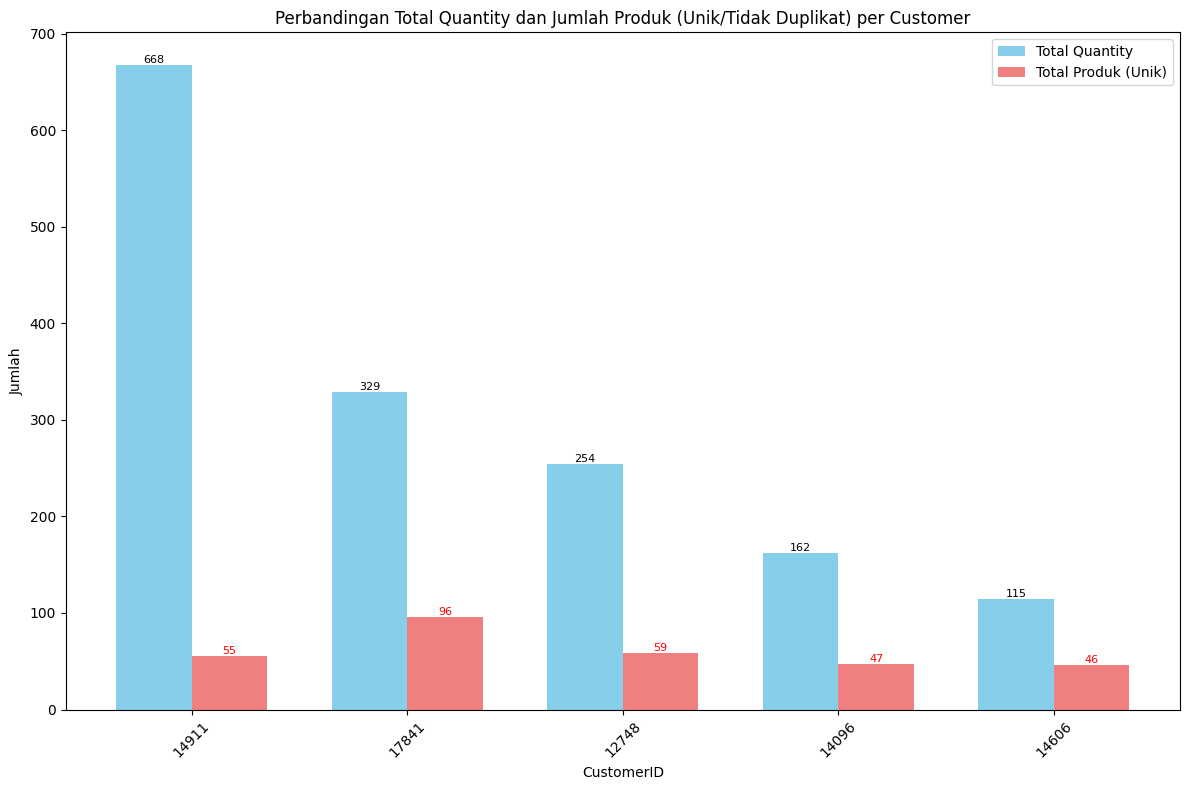

In [ ]:
#Visualisasi menggunakan Combo Chart (Memilih 10 Tertinggi)
fix_no5 = filtered_customers.head(10)
#tata letak
fig, ax = plt.subplots(figsize=(12, 8))

# Lebar bar
bar_width = 0.35
x = np.arange(len(fix_no5['CustomerID']))

#bar
ax.bar(x - bar_width/2,
       fix_no5['Total_Quantity'],
       width=bar_width,
       color='skyblue',
       label='Total Quantity')

#teks bar chart 1
for i, v in enumerate(fix_no5['Total_Quantity']):
    plt.text(i - bar_width/2, v, str(v), ha='center', va='bottom', fontsize=8)

#bar 2
ax.bar(x + bar_width/2,
       fix_no5['Unique_Products'],
       width=bar_width,
       color='lightcoral',
       label='Total Produk (Unik)')

# Teks pada Bar 2
for i, v in enumerate(fix_no5['Unique_Products']):
    plt.text(i + bar_width/2, v, str(v), ha='center', va='bottom', fontsize=8, color='red')


ax.set_xlabel('CustomerID')
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Total Quantity dan Jumlah Produk (Unik/Tidak Duplikat) per Customer')
ax.set_xticks(x)
ax.set_xticklabels(fix_no5['CustomerID'].astype(str), rotation=45)


# legend
ax.legend(loc='upper right')


#rapi
plt.tight_layout()
plt.show()



**Insight:** Berdasarkan analisis dan visualisasi di atas terkait *Pelanggan yang membeli produk > 40 produk yang unik dan total jumlah produk yang dibeli > 50 produk*. Tujuannya untuk mengidentifikasi pelanggan dengan pola pembelian yang luas dan intensif, serta mengetahui pelanggan mana yang paling berkontribusi pada penjualan dalam hal jumlah dan variasi produk.

Dari segi Total Quantity:
- **Customer ID 14911** ternyata membeli produk terbanyak di e-commerce **sebanyak 668 produk** dengan **55 jenis produk (unik)** yang berbeda dibandingkan dengan customer lainnya. Hal ini, menunjukkan bahwa customer tersebut kuantitasnya banyak sekali dalam membeli setiap produknya (asumsikan), sehingga jika kita lihat pada poin no 4, menunjukkan total amount (penjualan) nya tertinggi. Maka, sangat make sense sekali kuantitas yang dibeli banyak dapat meningkatkan total penjualan pada e-commerce.

Dari segi Total Jenis Produk (unik):
- **Customer ID 17842** ternyata membeli produk terbanyak ke dua di e-commerce **sebanyak 329 produk** dengan total tipe jenis produknya (unik) yang paling banyak sebanyak **96 jenis produk** dibandingkan pelanggan lainnya. Hal ini menunjukkan bahwa customer tersebut meskipun banyak jenis produk yang berbeda-beda tetapi kuantitasnya belum tentu lebih tinggi, sehingga jika jika lihat poin no 4, sangat make sense sekali dari segi transaksinya banyak karena pelanggan tersebut membeli produk jenis berbeda-beda dalam beda transaksi.

Secara keseluruhan:
- Ada sekelompok pelanggan yang tidak hanya membeli banyak produk tetapi juga menunjukkan ketertarikan pada banyak variasi produk.
- Mereka/pelanggan-pelanggan bisa dianggap sebagai **high-value customers** yang harus diprioritaskan dalam strategi pencegahan konsumen meninggalkan produk dan mendorong pelanggan untuk membeli suatu produk
- Pola produk yang paling banyak dibeli oleh kelompok ini bisa menjadi dasar untuk strategi pemasaran dan manajemen stok di e-commerce.

# Univariat dan Multivariat Analysis

### Pairplot Variabel Numerik (Multivaraite Analysis)

In [ ]:
#Numerikal Kolom
numerik = ['Quantity','UnitPrice']

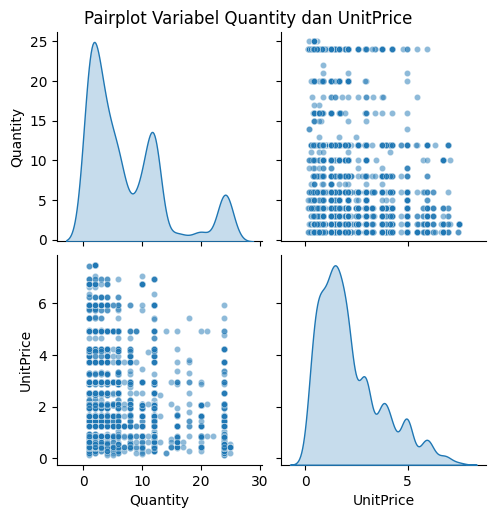

In [ ]:
#plot
sns.pairplot(df_bersih[numerik], diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle('Pairplot Variabel Quantity dan UnitPrice', y=1.02)
plt.show()

**Insight:**
1. Secara Distribusi Variabel
- Quantity: variabel quantity distribusinya cenderung right-skewed dengan beberapa puncak atau multimodal. Hal ini menunjukkan bahwa sebagian besar transaksi melibatkan jumlah produk dalam kisaran kecil (1–5), tetapi ada beberapa kelompok transaksi dengan jumlah produk lebih besar (10–20).
- UnitPrice: variabel UnitPrice distribusinya cenderung right-skewed, dengan sebagian besar produk memiliki harga rendah (sekitar di bawah 2–3). Produk dengan harga tinggi sangat jarang ditemukan.

2. Secara Scatterplot (Hubungan antar variabel)
- Secara hubungan antara variabel Quantity dengan UnitPrice tidak ada hubungan karena secara titik-titiknya menyebar dimana cenderung tidak menunjukkan garis linear (garis pada scatterplot).
- Sebagian besar transaksi dengan Quantity tinggi terjadi pada UnitPrice yang rendah.
- Banyak titik data yang terkonsentrasi di nilai Quantity rendah dan UnitPrice rendah.
- Data terlihat terkelompok dalam pola vertikal di sepanjang Quantity tertentu, yang mungkin menunjukkan jumlah pembelian yang sering berulang.


Secara Boxplot untuk melihat outlier pada variabel-variabel numerik:

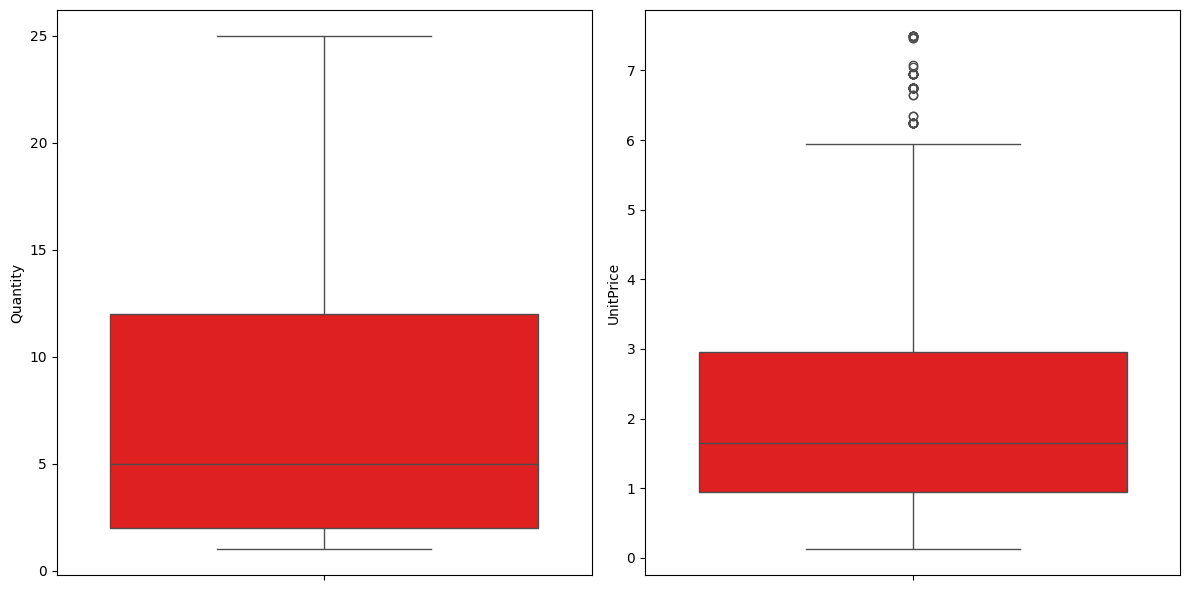

In [ ]:
#boxplot
# posisi
plt.figure(figsize=(12,6))

# plot
features = numerik
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_bersih[features[i]], color='red')
    plt.tight_layout()

Insight 2:
3. Outlier
- Terdapat beberapa titik dengan Quantity tinggi yang berpasangan dengan UnitPrice rendah. Hal ini bisa menjadi indikasi adanya pembelian grosir atau diskon besar.
- Di sisi lain, transaksi dengan UnitPrice tinggi umumnya memiliki Quantity yang kecil, mungkin menunjukkan produk premium atau khusus.

In [ ]:
df_bersih['UnitPrice'].describe()

,UnitPrice
count,4144.000000
mean,2.186824
std,1.550818
min,0.120000
25%,0.950000
50%,1.650000
75%,2.950000
max,7.500000


In [ ]:
# Check Outlier
outlier = df_bersih['UnitPrice'].min()

df_bersih[df_bersih['UnitPrice'] == outlier]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
940,565460,21401,BLUE PUDDING SPOON,24,9/5/2011 9:24,0.12,16843,United Kingdom
2497,581173,20668,DISCO BALL CHRISTMAS DECORATION,24,12/7/2011 15:07,0.12,17870,United Kingdom
3202,567164,16008,SMALL FOLDING SCISSOR(POINTED EDGE),4,9/18/2011 11:51,0.12,14487,United Kingdom
3911,581310,22422,TOOTHPASTE TUBE PEN,1,12/8/2011 11:43,0.12,16442,United Kingdom
4860,563709,85204,HANGING WOOD AND FELT FLOWER,5,8/18/2011 15:17,0.12,15472,United Kingdom


UnitPrice setelah di handling outlier, terdapat sekiranya pencilan, namun tidak begitu ekstrem karena harganya memang harga terendah pada produk itu, jadi dianggap wajar. Selain itu, dianggap wajar juga karena nilainya tidak jauh berbeda dari nilai yang lainnya.

### Correlation Heatmap

<Axes: >

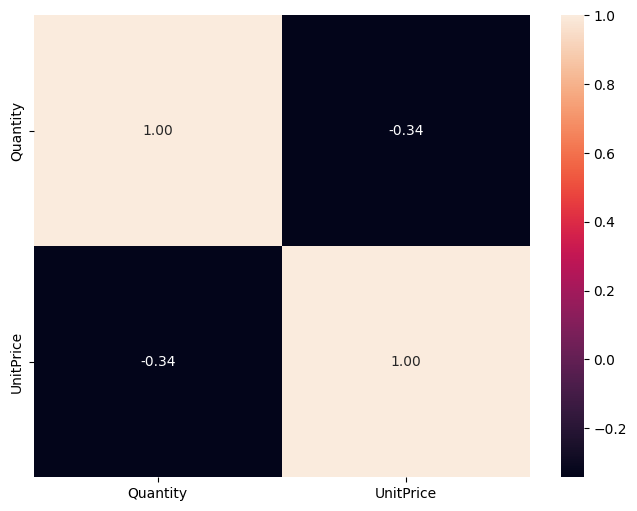

In [ ]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = df_bersih[numerik].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

**Insight:**
- Nilai korelasi antara Quantity dan UnitPrice adalah -0.34, yang menunjukkan korelasi negatif pada kedua variabel dimana hubungan korelasinya lemah. Interpretasi umumnya untuk korelasi: Ketika harga produk (UnitPrice) meningkat, maka cenderung terjadi penurunan jumlah produk yang dibeli (Quantity), meskipun hubungannya lemah.
- Hubungan negatif ini seringkali wajar dalam e-commerce: produk dengan harga yang lebih tinggi cenderung dibeli dalam jumlah yang lebih kecil, sedangkan produk dengan harga rendah cenderung dibeli dalam jumlah lebih banyak.

Rekomendasi perusahaan/tim:
- Produk dengan harga lebih rendah mungkin menjadi target untuk strategi dalam penjualan lebih lagi atau paket penjualan guna meningkatkan pendapatan.
- Produk dengan harga tinggi mungkin memerlukan strategi pemasaran khusus untuk meningkatkan daya tarik pembelian, seperti diskon atau promosi eksklusif atau program insentif lainnya. Sehingga, memungkinkan terjadi kenaikan produk pada harga tinggi.